In [1]:
import localgraphclustering as lgc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.patheffects as path_effects
# shapefile names 
riverslakes_shape='ne_50m_rivers_lake_centerlines_scale_rank'
lakes_shape='ne_50m_lakes'

In [2]:
# I don't understand why, but this needs to be in it's own cell...
plt.rcParams['figure.dpi'] = 200
# Only run this if you want high-quality intermediate figures -- but they get BIG! 

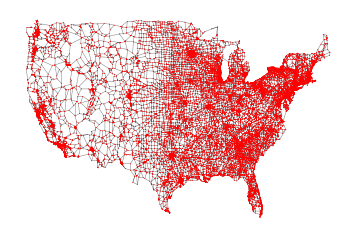

In [2]:
g = lgc.GraphLocal()
g.read_graph("usroads-simplify.edges", separator="\t")
xy = np.loadtxt("usroads-simplify.xy")
g.draw(xy,nodesize=0.5,edgealpha=0.5,linewidth=0.5)

In [3]:
## Get cities mapped
cities_str="""New York	1	New York	4.8	8405837	40.7127837	-74.0059413
Los Angeles	2	California	4.8	3884307	34.0522342	-118.2436849
Chicago	3	Illinois	-6.1	2718782	41.8781136	-87.6297982
Houston	4	Texas	11	2195914	29.7604267	-95.3698028
Philadelphia	5	Pennsylvania	2.6	1553165	39.9525839	-75.1652215
Phoenix	6	Arizona	14	1513367	33.4483771	-112.0740373
San Antonio	7	Texas	21	1409019	29.4241219	-98.4936282
San Diego	8	California	10.5	1355896	32.715738	-117.1610838
Dallas	9	Texas	5.6	1257676	32.7766642	-96.7969879
San Jose	10	California	10.5	998537	37.3382082	-121.8863286
Austin	11	Texas	31.7	885400	30.267153	-97.7430608
Indianapolis	12	Indiana	7.8	843393	39.768403	-86.158068
Jacksonville	13	Florida	14.3	842583	30.3321838	-81.655651
San Francisco	14	California	7.7	837442	37.7749295	-122.4194155
Columbus	15	Ohio	14.8	822553	39.9611755	-82.9987942
Charlotte	16	North Carolina	39.1	792862	35.2270869	-80.8431267
Fort Worth	17	Texas	45.1	792727	32.7554883	-97.3307658
Detroit	18	Michigan	-27.1	688701	42.331427	-83.0457538
El Paso	19	Texas	19.4	674433	31.7775757	-106.4424559
Memphis	20	Tennessee	-5.3	653450	35.1495343	-90.0489801
Seattle	21	Washington	15.6	652405	47.6062095	-122.3320708
Denver	22	Colorado	16.7	649495	39.7392358	-104.990251
Washington	23	District of Columbia	13	646449	38.9071923	-77.0368707
Boston	24	Massachusetts	9.4	645966	42.3600825	-71.0588801
Nashville	25	Tennessee	16.2	634464	36.1626638	-86.7816016
Baltimore	26	Maryland	-4	622104	39.2903848	-76.6121893
Oklahoma City	27	Oklahoma	20.2	610613	35.4675602	-97.5164276
Louisville	28	Kentucky	10	609893	38.2526647	-85.7584557
Portland	29	Oregon	15	609456	45.5230622	-122.6764816
Las Vegas	30	Nevada	24.5	603488	36.1699412	-115.1398296
Milwaukee	31	Wisconsin	0.3	599164	43.0389025	-87.9064736
Albuquerque	32	New Mexico	23.5	556495	35.0853336	-106.6055534
Tucson	33	Arizona	7.5	526116	32.2217429	-110.926479
Fresno	34	California	18.3	509924	36.7468422	-119.7725868
Sacramento	35	California	17.2	479686	38.5815719	-121.4943996
Long Beach	36	California	1.5	469428	33.7700504	-118.1937395
Kansas City	37	Missouri	5.5	467007	39.0997265	-94.5785667
Mesa	38	Arizona	13.5	457587	33.4151843	-111.8314724
Virginia Beach	39	Virginia	5.1	448479	36.8529263	-75.977985
Atlanta	40	Georgia	6.2	447841	33.7489954	-84.3879824
Colorado Springs	41	Colorado	21.4	439886	38.8338816	-104.8213634
Omaha	42	Nebraska	5.9	434353	41.2523634	-95.9979883
Raleigh	43	North Carolina	48.7	431746	35.7795897	-78.6381787
Miami	44	Florida	14.9	417650	25.7616798	-80.1917902
Oakland	45	California	1.3	406253	37.8043637	-122.2711137
Minneapolis	46	Minnesota	4.5	400070	44.977753	-93.2650108
Tulsa	47	Oklahoma	1.3	398121	36.1539816	-95.992775
Cleveland	48	Ohio	-18.1	390113	41.49932	-81.6943605
Wichita	49	Kansas	9.7	386552	37.688889	-97.336111""".split("\n")
cities=[]
for citystr in cities_str:
  parts = citystr.split("\t")
  name = parts[0]
  xc = float(parts[5])
  yc = float(parts[6])
  xyc = np.array([yc,xc])
  dists = np.sum((xy - xyc)**2,axis=1) 
  node = np.sum((xy - xyc)**2,axis=1).argmin()
  cities.append((name, node))
def nyc_as_nyc():
    cities[0] = ("New York", cities[0][1])
def nyc_as_rog():
    cities[0] = ("Rest of graph", cities[0][1])    

In [4]:
def label_city(xy, name):
    for c in cities:
        if c[0] == name:
            xc = xy[c[1],0]
            yc = xy[c[1],1]
            text = plt.text(xc,yc,c[0],fontsize=8,
                          color='white',
                          ha='center', va='center')
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                       path_effects.Normal()])

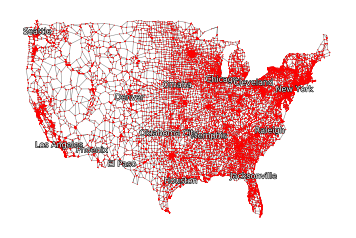

In [5]:
nyc_as_nyc()
def label_cities(xy, thresh=0.1):
    # we plot cities assuming your at least 10% away from previous points. 
    xrange = np.max(xy[:,0])-np.min(xy[:,0])
    yrange = np.max(xy[:,1])-np.min(xy[:,1])
    refrange = max(xrange,yrange)
    plotted = [] # the list of plotted cities
    for c in cities:
        xc = xy[c[1],0]
        yc = xy[c[1],1]
        # compute relative distance in x, y
        mindist = refrange # find the closed plotted city
        for p in plotted:
            d = np.sqrt((p[0]-xc)**2 + (p[1]-yc)**2)
            if d < mindist:
                mindist = d
        if mindist/refrange > thresh:
            #plt.text(xc,yc,c[0],fontsize=10)
            text = plt.text(xc,yc,c[0],fontsize=8,
                          color='white',
                          ha='center', va='center')
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                       path_effects.Normal()])
            plotted.append((xc,yc))
g.draw(xy,nodesize=0.5,edgealpha=0.5,linewidth=0.5)
label_cities(xy)

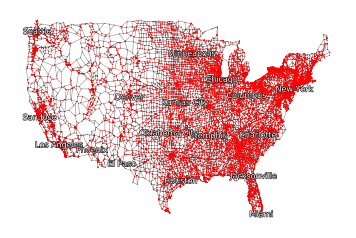

In [6]:
g.draw(xy,nodesize=0.5,edgealpha=0.5,linewidth=0.5)
label_cities(xy, thresh=0.08)

In [7]:
# Laplacian eigenvectors, adapted fro lgc
import numpy as np
import scipy as sp
import scipy.sparse.linalg as splinalg

def eig2_nL(g, tol_eigs = 1.0e-6, normalize:bool = True, dim:int=1):    
    n = g.adjacency_matrix.shape[0]

    D_sqrt_neg = sp.sparse.spdiags(g.dn_sqrt.transpose(), 0, n, n)

    L = sp.sparse.identity(n) - D_sqrt_neg.dot((g.adjacency_matrix.dot(D_sqrt_neg)))

    emb_eig_val, p = splinalg.eigsh(L, which='SM', k=1+dim, tol = tol_eigs)

    F = np.real(p[:,0:])
    if normalize:
        F *= g.dn_sqrt[:,np.newaxis]
    return F, emb_eig_val

def eig2_L(g, tol_eigs = 1.0e-6, normalize:bool = True, dim:int=1):    
    n = g.adjacency_matrix.shape[0]

    L = sp.sparse.spdiags(g.d, 0, n, n) - g.adjacency_matrix

    emb_eig_val, p = splinalg.eigsh(L, which='SM', k=1+dim, tol = tol_eigs)

    F = np.real(p[:,0:])
    if normalize:
        F *= g.dn_sqrt[:,np.newaxis]
    return F, emb_eig_val


In [19]:
# We want to try the trivial one too
V,vals = eig2_L(g, dim=5, tol_eigs=1e-4, normalize=False)
if V[0,1] < 0: # fix the signs
    V[:,1] *= -1 
V,vals

(array([[-0.00442184,  0.0067047 ,  0.00491174, -0.00060711, -0.01719805,
          0.00177636],
        [-0.00442184,  0.0067066 ,  0.00491508, -0.0006067 , -0.01722035,
          0.00177871],
        [-0.00442184,  0.00329618, -0.00091569, -0.00453287, -0.00210063,
         -0.00060071],
        ...,
        [-0.00442184, -0.00174085, -0.0076048 ,  0.01936606, -0.00444031,
          0.00584234],
        [-0.00442184, -0.00174085, -0.0076048 ,  0.01936607, -0.00444031,
          0.00584234],
        [-0.00442184, -0.00174092, -0.00760546,  0.0193694 , -0.00444128,
          0.0058438 ]]),
 array([-4.16055450e-17,  3.79189124e-05,  8.69140201e-05,  1.71790332e-04,
         2.17500192e-04,  2.48849455e-04]))

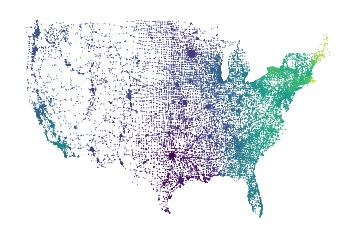

In [9]:
g.draw(xy,nodesize=0.5,edgealpha=0.1,linewidth=0.5,nodecolor=V[:,0])

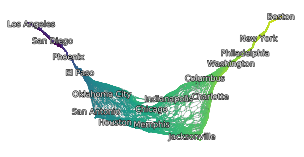

In [20]:
# use the permutation from each vector to linearize the embedding 
# https://stackoverflow.com/questions/11649577/how-to-invert-a-permutation-array-in-numpy
def invert_permutation(p):
    s = np.empty(p.size, p.dtype)
    s[p] = np.arange(p.size)
    return s
# the negative sign in V[:,1] is just to get NYC /Boston on the right 
P = np.array([invert_permutation(np.argsort(-V[:,1])),invert_permutation(np.argsort(V[:,2]))]).T
drawing = g.draw(P,nodesize=0.6,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,0])
label_cities(P,thresh=0.1)
drawing.fig.set_size_inches(5,2.5)
plt.savefig('usroads-spectral-embed.pdf', bbox_inches='tight',pad_inches = 0)
plt.savefig('usroads-spectral-embed.png', dpi=300,bbox_inches='tight',pad_inches = 0)

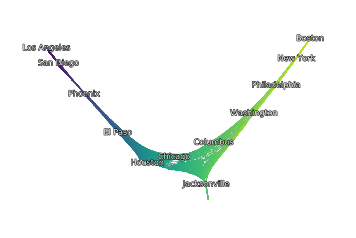

In [11]:
g.draw(V[:,[1,2]],nodesize=0.6,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,0])
label_cities(V[:,[1,2]])

In [12]:
# normalize rows
Vn = np.copy(V[:,0:3])
Vn = Vn / np.linalg.norm(Vn, axis=1)[:, np.newaxis]
np.linalg.norm(Vn,axis=1)
#Vn = 
#Q = np.linalg.qr(V)[0]

array([1., 1., 1., ..., 1., 1., 1.])

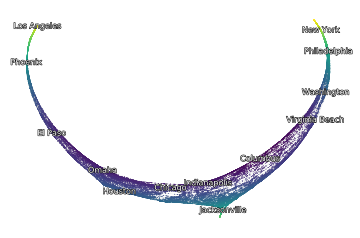

In [13]:
g.draw(Vn[:,[1,2]],nodesize=0.5,edgealpha=0.1,linewidth=0.5,nodecolor=Vn[:,0])
label_cities(Vn[:,[1,2]])

# Find a local embedding that highlights the western cooridor.

In [14]:
# Original code with west coast on right hand side of plot... 
#R = list(np.where( P[:,0] > 44000 )[0])
#len(R)

In [21]:
R = list(np.where( P[:,0] < P.shape[0] - 44000 -1 )[0]) # 2019-12-04 This was reveresed to show NYC on right as in the real map. The length of R should be 7143 so we could just do P:,0] < 7143 too 
len(R)

7143

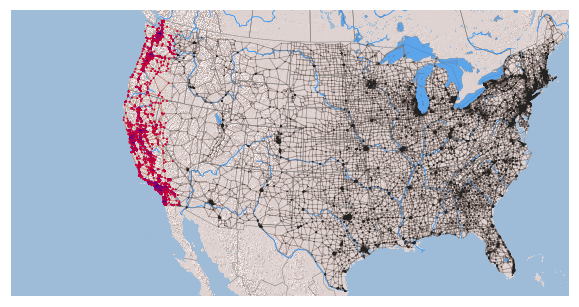

In [22]:
nodecolor1 = '#222222'
nodecolor2 = '#555555'
nodecolor3 = '#80b1d3'
edgecolor1 = '#fc8d62'
edgecolor2 = '#777777'
edgecolor2=edgecolor1
nodecolor2=nodecolor1
import matplotlib.patheffects as pe
def drawusmap():
  f,axes = plt.subplots(1,1, figsize=(10,10))
  axes.set_rasterization_zorder(5)
  axes.xaxis.set_major_locator(plt.NullLocator())
  axes.yaxis.set_major_locator(plt.NullLocator())

  # setup Lambert Conformal basemap.
  # set resolution=None to skip processing of boundary datasets.
  # from https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
  m = Basemap(llcrnrlon=-130.25,llcrnrlat=19.75,urcrnrlon=-63.5,urcrnrlat=49,
              projection='lcc',lat_1=33,lat_2=45,lon_0=-95,epsg=2163)
  #m.shadedrelief(alpha=0.75,ax=axes)
  m.arcgisimage(xpixels=4096, alpha=0.75, axes=axes, 
                zorder=0.5, service='World_Shaded_Relief')
  xlims = axes.get_xlim()
  ylims = axes.get_ylim()
  #m.arcgisimage(service = 'World_Shaded_Relief', xpixels = 12000, alpha=0.5)
  m.drawcountries(ax=axes,color='grey',linewidth=0.5,zorder=0.5)
  m.drawstates(ax=axes,color='grey',linewidth=0.5,zorder=0.5)
  
  # handle Rivers
  m.readshapefile(riverslakes_shape,'myrivers',color='dodgerblue',
                  linewidth=0.75,zorder=0.75,drawbounds=True)

  # handle Lakes
  m.readshapefile(lakes_shape, 'mylakes',drawbounds=False)
  patches = []
  for info, shape in zip(m.mylakes_info, m.mylakes):
      patches.append( Polygon(np.array(shape), True) )
  axes.add_collection(PatchCollection(patches, 
                                      facecolor='dodgerblue',
                                      edgecolor='grey', 
                                      linewidths=0.5, zorder=0.75, alpha=0.5))

  # draw graph
  xp,yp = m(xy[:,0],xy[:,1])
  xyp = np.column_stack((xp,yp))

  #drawing = g.draw(xyp,nodesize=0.8,edgealpha=0.5,linewidth=0.5,
                   #nodealpha=0.5,axs=axes,nodecolor=nodecolor)
  #fc8d62  
  drawing = g.draw(xyp,nodesize=1.0,edgealpha=0.5,linewidth=0.9,
                   nodealpha=0.3,axs=axes,nodecolor=nodecolor2,edgecolor=edgecolor2)
  drawing.nodewidth(range(g._num_vertices), 0.2)
  stroke = [pe.withStroke(linewidth=0.5,
                                 foreground="#777777")]
  drawing.edge_collection.set_path_effects(stroke)
  #axes.set_xlim(np.min(xp)-100000,np.max(xp)+20000)
  axes.set_xlim(xlims)
  axes.set_ylim(np.min(yp)-50000,np.max(yp)+50000)
  
  return drawing, m, axes

drawing,bm,ax = drawusmap()
drawing.highlight(R)

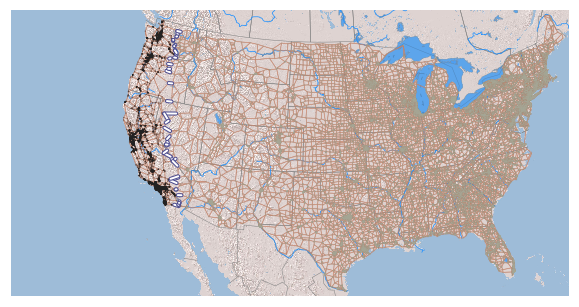

In [23]:
import matplotlib.collections 
import matplotlib.patheffects as pe
def myhighlight(drawing,S,reverse=False,inputset=True):
    Sset = set(S)
    Sbar = set(range(drawing.G._num_vertices)) - Sset
    old_edge_colors = drawing.edge_collection.get_color()
    old_edge_segs = drawing.edge_collection.get_segments()
    if reverse:
        S = list(Sbar)
        Sset,Sbar = Sbar,Sset
    if inputset:
        #drawing.nodecolor(S, '#ff7f00', alpha=0.25)
        #drawing.nodecolor(S, 'crimson', alpha=0.25)
        drawing.nodecolor(S, alpha=0.25)
    else:
        #drawing.nodecolor(S, '#fb8072', alpha=0.25)
        #drawing.nodecolor(S, '#7F3C8D', alpha=0.25)
        drawing.nodecolor(S, alpha=0.25)
    #drawing.nodecolor(list(Sbar), '#777777', alpha=0.25)
    drawing.nodecolor(list(Sbar), '#A5AA99', alpha=0.25)
    cut_edges = []
    for (i,j) in drawing.edge_mapping.keys():
        if (i in Sbar and j in Sbar) or (i in Sset and j in Sset):
            #drawing.edgecolor(i,j,alpha=0.33)
            pass
        else:
            #drawing.edgecolor(i,j,c='crimson',alpha=1.0)
            #drawing.edgecolor(i,j,c='#F2B701',alpha=0.0)
            drawing.edgecolor(i,j,c='#80BA5A',alpha=0.0)
            idx = drawing.edge_mapping[(i,j)]
            cut_edges.append(idx)
    cut_edge_segments = [old_edge_segs[i] for i in cut_edges]
    cut_edge_collection = matplotlib.collections.LineCollection(cut_edge_segments)
    cut_edge_collection.set_linewidths(2)
    cut_edge_collection.set_zorder(drawing.edge_collection.get_zorder()+1)
    #cut_edge_collection.set_edgecolor(c='#ffff33')
    #cut_edge_collection.set_edgecolor(c='crimson')
    cut_edge_collection.set_edgecolor(c='w')
    cut_edge_collection.set_capstyle('round')
    #cut_edge_collection.set_edgecolor(c='#80BA5A')
    stroke = [pe.withStroke(linewidth=4,capstyle="round",
                                 #foreground="#4b4b8f")]
                            #foreground="b")]
                            foreground="#4b4b8f")]
    drawing.cut_edge_collection = cut_edge_collection
    drawing.ax.add_collection(cut_edge_collection)
    cut_edge_collection.set_path_effects(stroke)
    drawing.ax._sci(cut_edge_collection)
    
drawing, bm, ax = drawusmap()
myhighlight(drawing, R, inputset=False)  

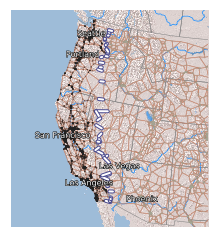

In [24]:
#drawing = g.draw(xy,nodesize=0.25,edgealpha=0.5,linewidth=0.5)
drawing,bm,ax = drawusmap()
myhighlight(drawing, R, inputset=False)  
xp,yp = bm(xy[:,0],xy[:,1])
xyp = np.column_stack((xp,yp))
#label_cities(xyp,thresh=0.035)
drawing.fig.set_size_inches(4,4)
ax.set_xlim((bm(-130,40)[0], bm(-105,40)[0]))
ax.set_ylim((bm(-110,31)[1], ax.get_ylim()[1]))
label_city(xyp,"Las Vegas")
label_city(xyp,"Los Angeles")
label_city(xyp,"San Francisco")
label_city(xyp,"Phoenix")
label_city(xyp,"Seattle")
label_city(xyp,"Portland")
plt.savefig('usroads-flow-embed-set-map.png', dpi=400,bbox_inches='tight',pad_inches = 0)

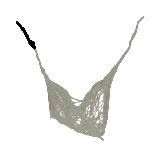

In [25]:
# find the western region
# R = list(np.where( P[:,0] > 45000 )[0]) # Initial set
# R = list(np.where( P[:,0] > 44000 )[0])
drawing = g.draw(P,nodesize=1.0,edgealpha=0.5,linewidth=0.8,
                   nodealpha=0.5,nodecolor='#A5AA99',edgecolor=edgecolor2)

drawing.nodewidth(range(g._num_vertices), 0.2)
stroke = [pe.withStroke(linewidth=0.5,
                                 foreground="#777777")]
drawing.edge_collection.set_path_effects(stroke)

drawing.highlight(R)
drawing.nodecolor(R, 'k')
drawing.fig.set_size_inches(2.5,2.5)
plt.savefig('usroads-spectral-embed-set.pdf', bbox_inches='tight',pad_inches = 0)
plt.savefig('usroads-spectral-embed-set.png', dpi=300,bbox_inches='tight',pad_inches = 0)

In [ ]:
## Try a simple spectral embedding
ntrials = 100
X = -10*np.ones((g._num_vertices,ntrials))
for i in range(ntrials):
    Rs = np.random.choice(R,len(R)//2,replace=False) # // is int division
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    spr = lgc.approximate_PageRank(g,Rs,normalize=False,rho=1e-8,method='l1reg-rand',alpha=0.01,iterations=1000000)
    X[spr[0],i] = np.log10(spr[1]/np.max(spr[1]))
#U = np.linalg.svd(X)[0]

In [ ]:
g.draw(xy,nodecolor=X[:,0])

In [ ]:
XQ,XR = np.linalg.qr(X)
UR = np.linalg.svd(XR)[0]
U = XQ.dot(UR)
g.draw(U[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[0,1]],thresh=0.05)
g.draw(U[:,[1,2]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
nyc_as_rog()
label_cities(U[:,[1,2]])

In [26]:
import queue
def seed_grow_bfs_steps(g,seeds,steps):
    """
    grow the initial seed set through BFS until its size reaches 
    a given ratio of the total number of nodes.
    """
    Q = queue.Queue()
    visited = np.zeros(g._num_vertices)
    visited[seeds] = 1
    for s in seeds:
        Q.put(s)
    if isinstance(seeds,np.ndarray):
        seeds = seeds.tolist()
    else:
        seeds = list(seeds)
    for step in range(steps):
        for k in range(Q.qsize()):
            node = Q.get()
            si,ei = g.adjacency_matrix.indptr[node],g.adjacency_matrix.indptr[node+1]
            neighs = g.adjacency_matrix.indices[si:ei]
            for i in range(len(neighs)):
                if visited[neighs[i]] == 0:
                    visited[neighs[i]] = 1
                    seeds.append(neighs[i])
                    Q.put(neighs[i])
    return seeds
from scipy.sparse.csgraph import connected_components
from collections import Counter
def largest_cc(G,S):
    subgraph = G.adjacency_matrix[S,:][:,S]
    ret = connected_components(subgraph,directed=False)
    l = Counter(ret[1]).most_common(1)[0][0]
    S = [S[i] for i in range(len(S)) if ret[1][i] == l]
    return S

In [27]:
## Try a simple spectral embedding
ntrials = 500
np.random.seed(67) # these all look mostly the same, but we just cherry pick one that looks like like an initial figure we had described in the text  
X = -10*np.ones((g._num_vertices,ntrials))
for i in range(ntrials):
    #Rs = np.random.choice(R,len(R)//2,replace=False) # // is int division
    #Rs = np.random.choice(R,len(R)//10,replace=False) # // is int division
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    #Rs = largest_cc(g,seed_grow_bfs_steps(g,Rs,3))
    Rs = np.random.choice(R,1,replace=False) # // is int division
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    Rs = largest_cc(g,seed_grow_bfs_steps(g,Rs,20))
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    spr = lgc.approximate_PageRank(g,Rs,normalize=False,rho=1e-6,method='l1reg-rand',alpha=0.01,iterations=1000000)
    X[spr[0],i] = np.log10(spr[1]/np.max(spr[1]))
#U = np.linalg.svd(X)[0]

KeyboardInterrupt: 

In [28]:
X

array([[-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       ...,
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.]])

In [30]:
from ipywidgets import IntProgress
from IPython.display import display
ntrials = 500
f = IntProgress(min=0, max=ntrials) # instantiate the bar
display(f) # display the bar
np.random.seed(67) # these all look mostly the same, but we just cherry pick one that looks like like an initial figure we had described in the text  
X = -10*np.ones((g._num_vertices,ntrials))
for i in range(ntrials):
    f.value += 1
    #Rs = np.random.choice(R,len(R)//2,replace=False) # // is int division
    #Rs = np.random.choice(R,len(R)//10,replace=False) # // is int division
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    #Rs = largest_cc(g,seed_grow_bfs_steps(g,Rs,3))
    Rs = np.random.choice(R,1,replace=False) # // is int division
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    Rs = largest_cc(g,seed_grow_bfs_steps(g,Rs,20))
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    spr = lgc.approximate_PageRank(g,Rs,normalize=False,rho=1e-6,method='l1reg-rand',alpha=0.01,iterations=1000000)
    X[spr[0],i] = np.log10(spr[1]/np.max(spr[1]))

IntProgress(value=0, max=500)

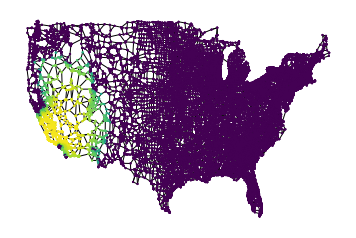

In [29]:
g.draw(xy,nodecolor=X[:,0])

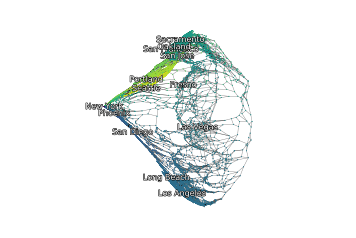

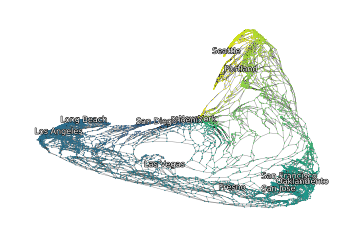

In [31]:
XQ,XR = np.linalg.qr(X)
UR = np.linalg.svd(XR)[0]
U = XQ.dot(UR)
g.draw(U[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[0,1]],thresh=0.01)
g.draw(U[:,[1,2]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[1,2]],thresh=0.01)

In [32]:
np.sum(X+10,axis=1) <= 0

array([False, False,  True, ...,  True,  True,  True])

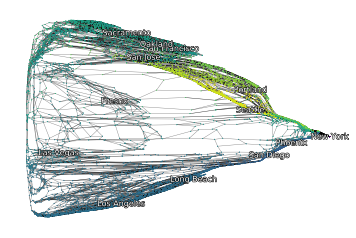

In [33]:
Uf = np.copy(U)
Uf[np.sum(X+10,axis=1) <= 0,0] =10 
Uf[np.sum(X+10,axis=1) <= 0,1] =10 
P = np.array([invert_permutation(np.argsort(-Uf[:,0])),invert_permutation(np.argsort(Uf[:,1]))]).T
P[np.sum(X+10,axis=1) <= 0,0] =51500
P[np.sum(X+10,axis=1) <= 0,1] =4000
drawing = g.draw(P[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(P[:,[0,1]],thresh=0.05)

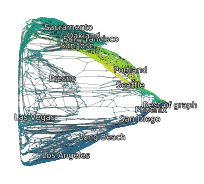

In [35]:
nyc_as_rog()
drawing = g.draw(P[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
#label_cities(P[:,[0,1]],thresh=0.05)
drawing.fig.set_size_inches(3,3)
label_cities(P[:,[0,1]],thresh=0.05)
plt.savefig('usroads-spectral-embed-u01-permute.png', dpi=600,bbox_inches='tight',pad_inches = 0)

In [98]:
## Try a simple spectral embedding
# # these all look mostly the same, but we just cherry pick one that looks like like an initial figure we had described in the text  
#  seed 67 gave us the result. 
ntrials = 500
for rseed in range(50,50):
    np.random.seed(rseed) 
    X = -10*np.ones((g._num_vertices,ntrials))
    for i in range(ntrials):
        #Rs = np.random.choice(R,len(R)//2,replace=False) # // is int division
        #Rs = np.random.choice(R,len(R)//10,replace=False) # // is int division
        #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
        #Rs = largest_cc(g,seed_grow_bfs_steps(g,Rs,3))
        Rs = np.random.choice(R,1,replace=False) # // is int division
        #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
        Rs = largest_cc(g,seed_grow_bfs_steps(g,Rs,20))
        #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
        spr = lgc.approximate_PageRank(g,Rs,normalize=False,rho=1e-6,method='l1reg-rand',alpha=0.01,iterations=1000000)
        X[spr[0],i] = np.log10(spr[1]/np.max(spr[1]))
    #U = np.linalg.svd(X)[0]
    XQ,XR = np.linalg.qr(X)
    UR = np.linalg.svd(XR)[0]
    U = XQ.dot(UR)
    Uf = np.copy(U)
    Uf[np.sum(X+10,axis=1) <= 0,0] =10 
    Uf[np.sum(X+10,axis=1) <= 0,1] =10 
    P = np.array([invert_permutation(np.argsort(-Uf[:,0])),invert_permutation(np.argsort(Uf[:,1]))]).T
    P[np.sum(X+10,axis=1) <= 0,0] =51500
    P[np.sum(X+10,axis=1) <= 0,1] =4000
    drawing = g.draw(P[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
#label_cities(P[:,[0,1]],thresh=0.05)
    drawing.fig.set_size_inches(3,3)
    label_cities(P[:,[0,1]],thresh=0.05)
    plt.savefig('usroads-spectral-embed-u01-permute-%i.png'%(rseed), dpi=300,bbox_inches='tight',pad_inches = 0)

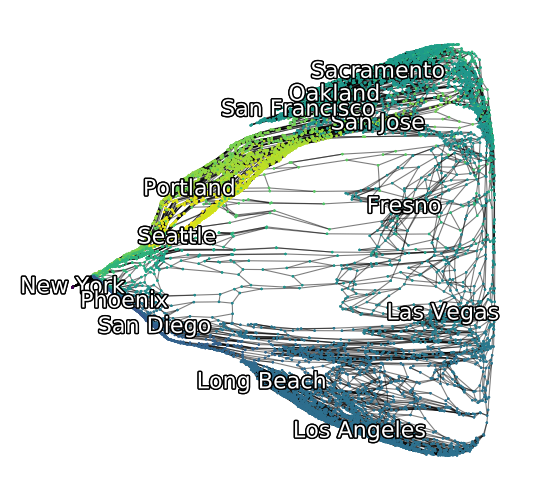

In [394]:
# This was the initial figure 
#drawing = g.draw(P[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
#label_cities(P[:,[0,1]],thresh=0.05)
#drawing.fig.set_size_inches(3,3)
#label_cities(P[:,[0,1]],thresh=0.05)
#plt.savefig('usroads-spectral-embed-u01-permute.png', dpi=300,bbox_inches='tight',pad_inches = 0)


In [281]:
## Try a simple flow embedding
ntrials = 500
Xf = -1*np.ones((g._num_vertices,ntrials))
for i in range(ntrials):
    #Rs = np.random.choice(R,len(R)//10,replace=False) # // is int division
    Rs = np.random.choice(R,1,replace=False) # // is int division
    #S,cond = lgc.flow_clustering(G,Rs,method='sl',delta=0.1)
    Rs = largest_cc(g,seed_grow_bfs_steps(g,Rs,20))
    print("run = %i, len=%i"%(i, len(Rs)))
    Sf = lgc.flow_clustering(g,Rs,method="sl",delta=0.1)[0]
    Xf[Sf,i] = 0

run = 0, len=718
run = 1, len=873
run = 2, len=802
run = 3, len=728
run = 4, len=929
run = 5, len=805
run = 6, len=583
run = 7, len=855
run = 8, len=595
run = 9, len=905
run = 10, len=1305
run = 11, len=1217
run = 12, len=1104
run = 13, len=1128
run = 14, len=684
run = 15, len=1328
run = 16, len=922
run = 17, len=816
run = 18, len=535
run = 19, len=1116
run = 20, len=1101
run = 21, len=569
run = 22, len=433
run = 23, len=622
run = 24, len=408
run = 25, len=1345
run = 26, len=808
run = 27, len=706
run = 28, len=1182
run = 29, len=911
run = 30, len=671
run = 31, len=717
run = 32, len=484
run = 33, len=558
run = 34, len=992
run = 35, len=784
run = 36, len=1006
run = 37, len=931
run = 38, len=790
run = 39, len=760
run = 40, len=660
run = 41, len=903
run = 42, len=916
run = 43, len=686
run = 44, len=762
run = 45, len=774
run = 46, len=703
run = 47, len=977
run = 48, len=546
run = 49, len=1182
run = 50, len=1944
run = 51, len=1014
run = 52, len=800
run = 53, len=1042
run = 54, len=597
run = 

In [290]:
np.random.random((5,3))

array([[0.09984706, 0.0671199 , 0.21288192],
       [0.76602475, 0.19826544, 0.33474436],
       [0.86162314, 0.88040901, 0.18529993],
       [0.30897807, 0.69288097, 0.87375642],
       [0.89170053, 0.08307205, 0.28141471]])

In [429]:
np.savetxt("usroads-flow-results.csv.gz", Xf, fmt='%i', delimiter=",")

In [36]:
Xf = np.loadtxt("usroads-flow-results.csv.gz", delimiter=",")

In [37]:
def rand_jitter(arr,scale=0.01):
    stdev =scale*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev
Urand = np.apply_along_axis(lambda u: rand_jitter(u,0.05), 0, U)

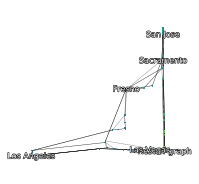

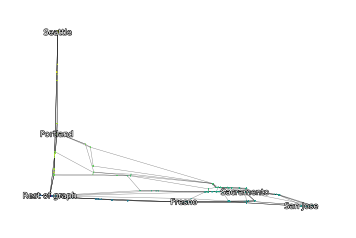

In [38]:
XfE = Xf+1
XQ,XR = np.linalg.qr(XfE)
UR = np.linalg.svd(XR)[0]
U = XQ.dot(UR)
Urand = np.apply_along_axis(lambda u: rand_jitter(u,0.00), 0, U)
drawing = g.draw(Urand[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(Urand[:,[0,1]],thresh=0.05)
drawing.fig.set_size_inches(3,3)
plt.savefig('usroads-flow-embed-u01.png', dpi=300,bbox_inches='tight',pad_inches = 0)
g.draw(U[:,[1,2]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[1,2]])
plt.savefig('usroads-flow-embed-u12.png', dpi=300,bbox_inches='tight',pad_inches = 0)

In [39]:
np.sum(np.sum(Xf+1,axis=1)[R] >= 1)

7143

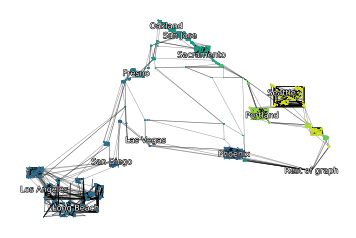

In [40]:
Uf = np.copy(U)
Uf[np.sum(Xf+1,axis=1) < 1,0] =10 
Uf[np.sum(Xf+1,axis=1) < 1,1] =10 
P = np.array([invert_permutation(np.argsort(Uf[:,0])),invert_permutation(np.argsort(Uf[:,1]))]).T
P[np.sum(Xf+1,axis=1) < 1,0] =8000
P[np.sum(Xf+1,axis=1) < 1,1] =2000
drawing = g.draw(P[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(P[:,[0,1]],thresh=0.05)

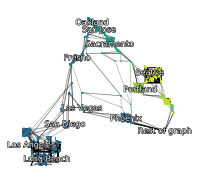

In [41]:
drawing = g.draw(P[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
drawing.fig.set_size_inches(3,3)
label_cities(P[:,[0,1]],thresh=0.05)
plt.savefig('usroads-flow-embed-u01-permute.png', dpi=600,bbox_inches='tight',pad_inches = 0)


## Below are all temp codes. 

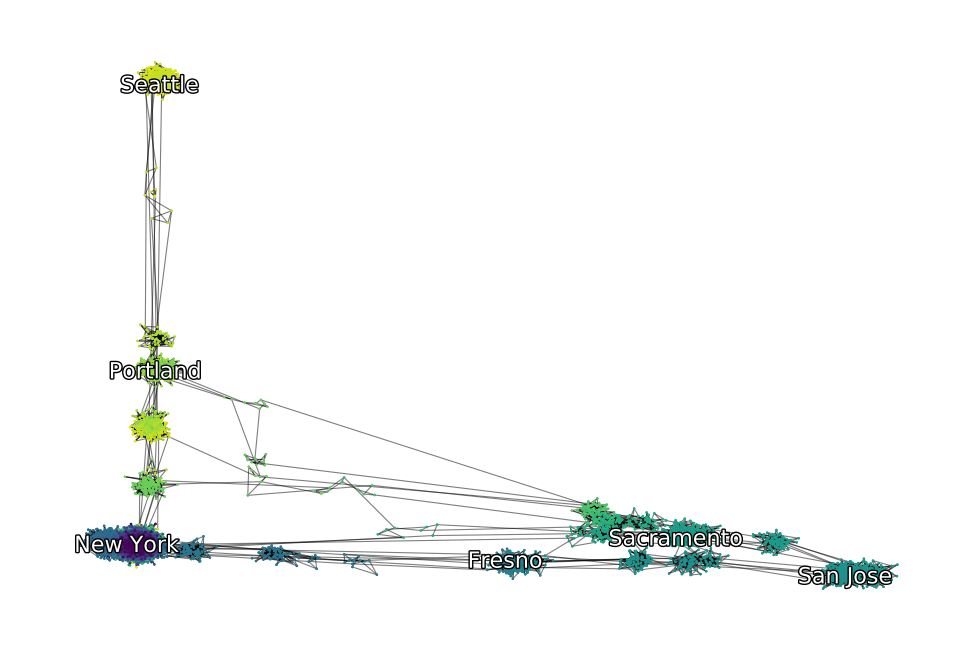

In [322]:
g.draw(Urand[:,[1,2]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(Urand[:,[1,2]],thresh=0.05)
#plt.savefig('usroads-flow-embed-u12.png', dpi=300,bbox_inches='tight',pad_inches = 0)

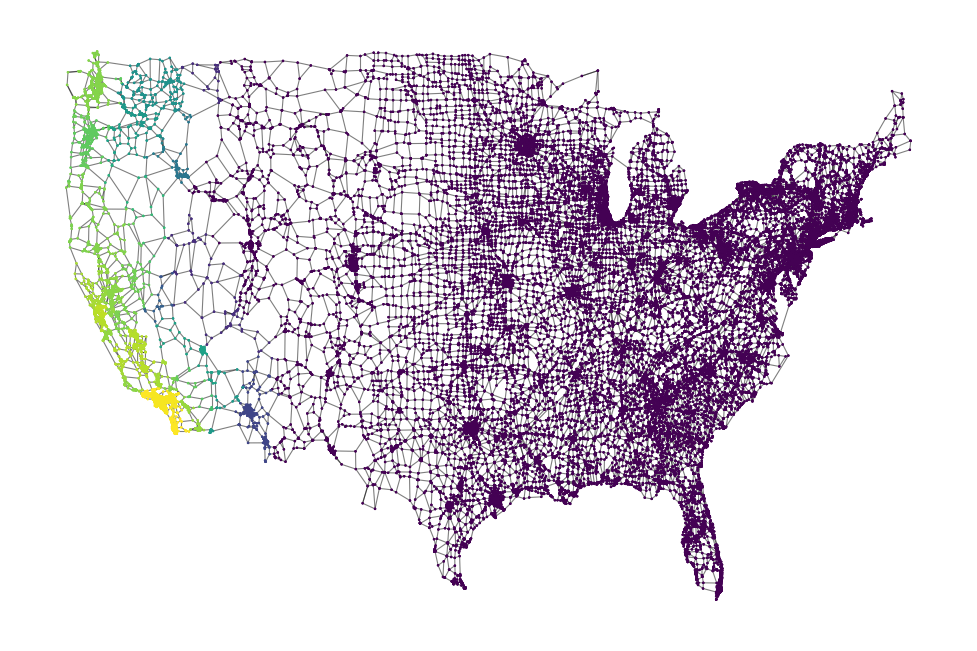

In [324]:
g.draw(xy,nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=np.log10(np.sum(Xf+1,axis=1)+1))
plt.savefig('usroads-flow-embed-visits.png', dpi=300,bbox_inches='tight',pad_inches = 0)

In [341]:
nsamp = 50


In [346]:
nsteps = 100 
nsamp = 50
Y = np.zeros((Xf.shape[0], nsteps))
for i in range(nsteps):
    Xfsamp = Xf[:,np.random.choice(range(Xf.shape[1]), nsamp)]
    x = np.log10(np.sum(Xfsamp+1,axis=1)+1)
    Y[:,i] = x

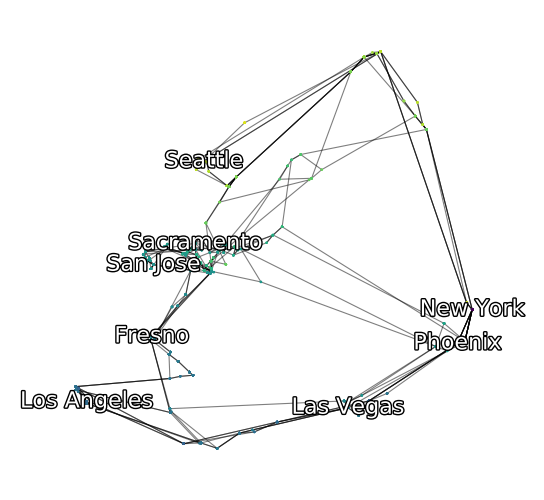

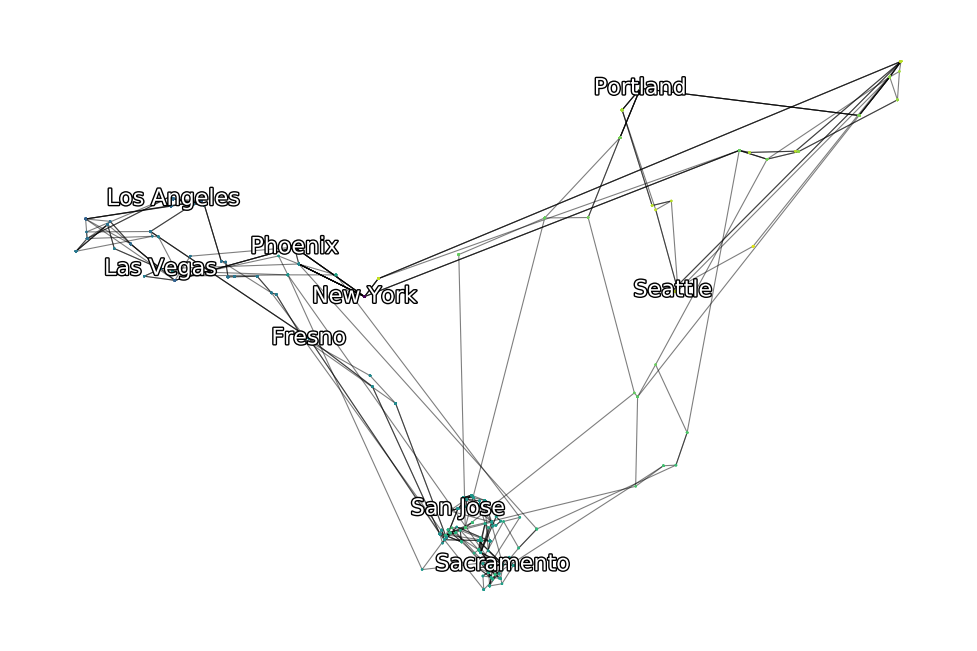

In [348]:
XfE = Y
XQ,XR = np.linalg.qr(XfE)
UR = np.linalg.svd(XR)[0]
U = XQ.dot(UR)
Urand = np.apply_along_axis(lambda u: rand_jitter(u,0.01), 0, U)
drawing = g.draw(U[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[0,1]],thresh=0.05)
drawing.fig.set_size_inches(3,3)
#plt.savefig('usroads-flow-embed-u01.png', dpi=300,bbox_inches='tight',pad_inches = 0)
g.draw(U[:,[1,2]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[1,2]])
#plt.savefig('usroads-flow-embed-u12.png', dpi=300,bbox_inches='tight',pad_inches = 0)

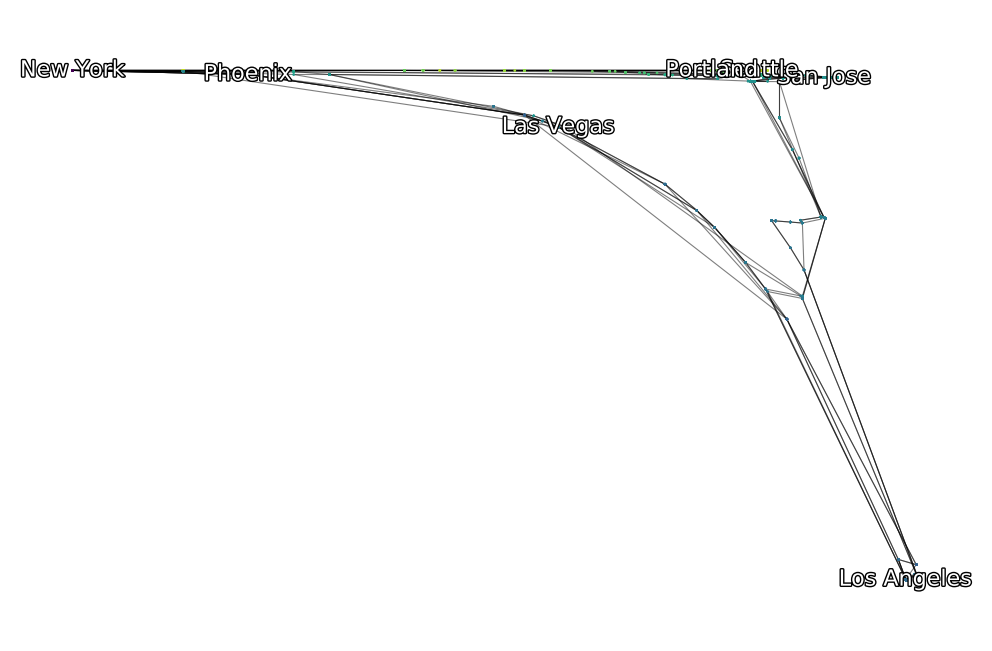

In [337]:
x = np.log10(np.sum(Xf+1,axis=1)+1)
y = U[:,0]
xyt = np.stack((x,y),axis=1)
drawing = g.draw(xyt[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(xyt[:,[0,1]],thresh=0.05)


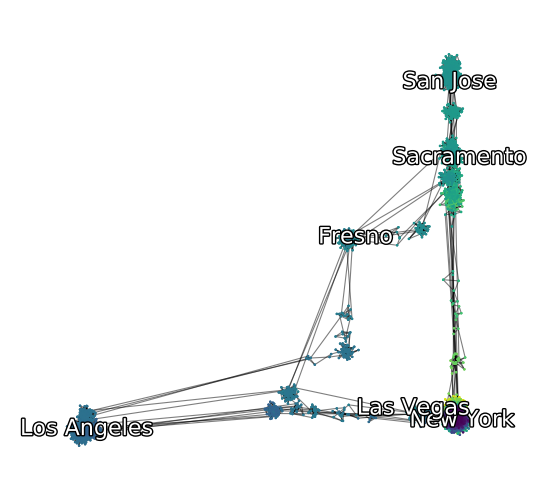

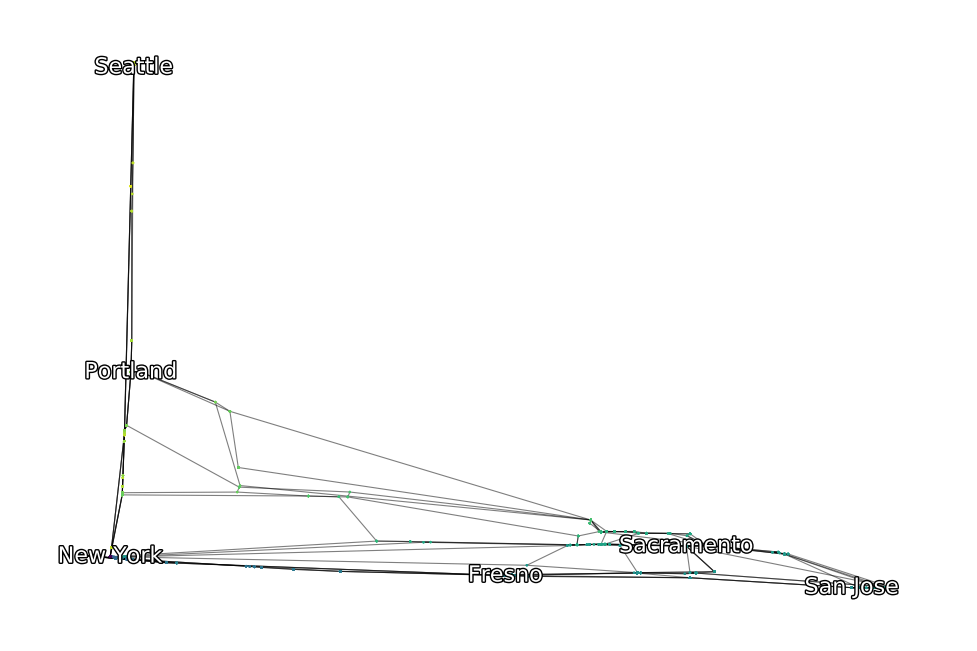

In [338]:
XfE = np.log10(Xf+2)
XQ,XR = np.linalg.qr(XfE)
UR = np.linalg.svd(XR)[0]
U = XQ.dot(UR)
Urand = np.apply_along_axis(lambda u: rand_jitter(u,0.01), 0, U)
drawing = g.draw(Urand[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(Urand[:,[0,1]],thresh=0.05)
drawing.fig.set_size_inches(3,3)
#plt.savefig('usroads-flow-embed-u01.png', dpi=300,bbox_inches='tight',pad_inches = 0)
g.draw(U[:,[1,2]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[1,2]])
#plt.savefig('usroads-flow-embed-u12.png', dpi=300,bbox_inches='tight',pad_inches = 0)

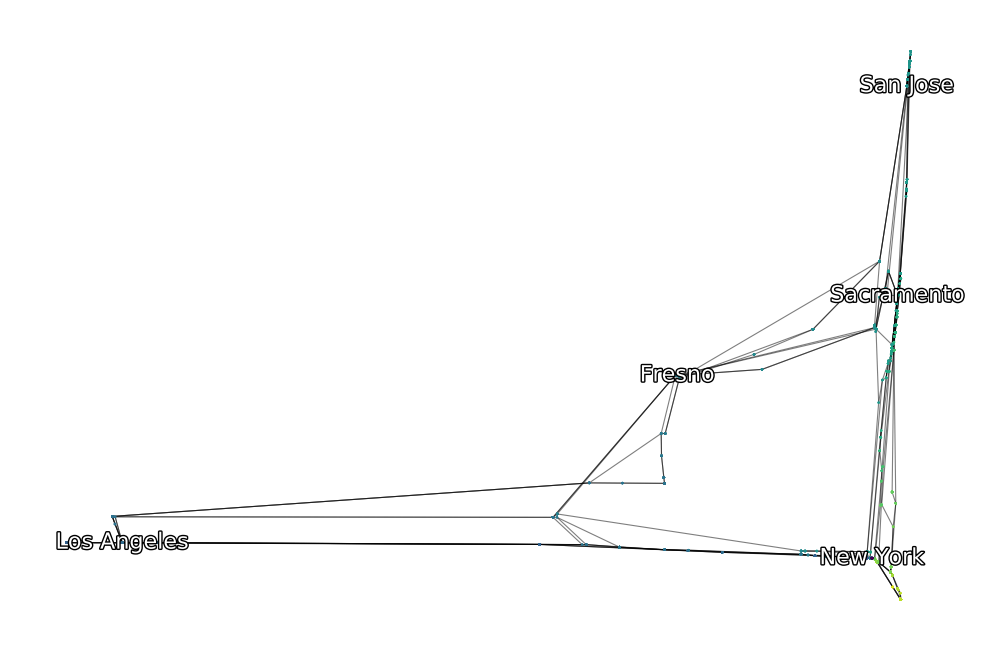

In [299]:
from sklearn.preprocessing import StandardScaler
Xfs = StandardScaler().fit_transform(Xf)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Vpca = pca.fit_transform(Xfs)
g.draw(Vpca,nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(Vpca)

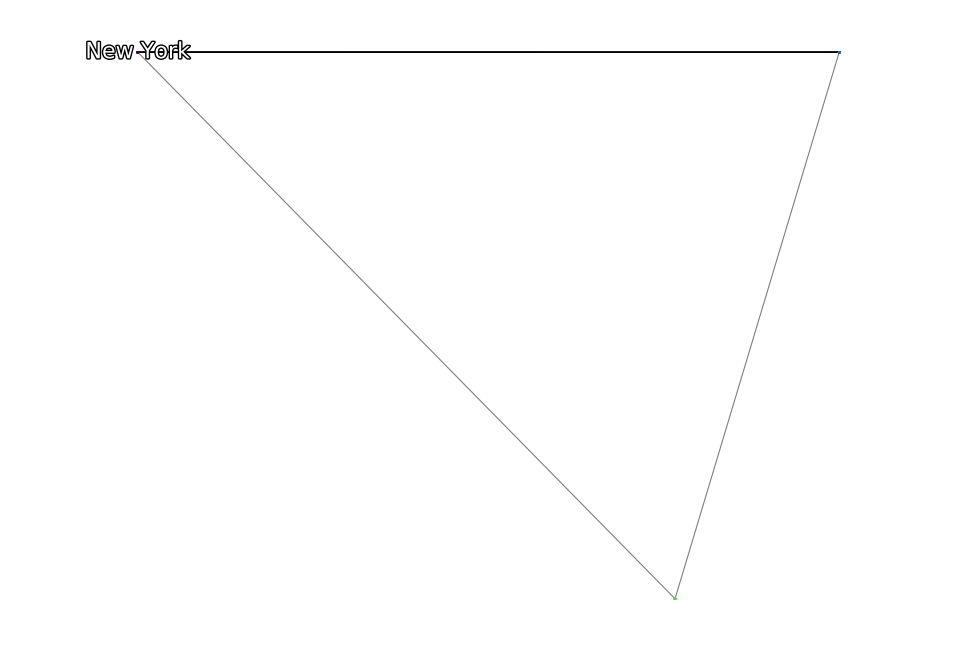

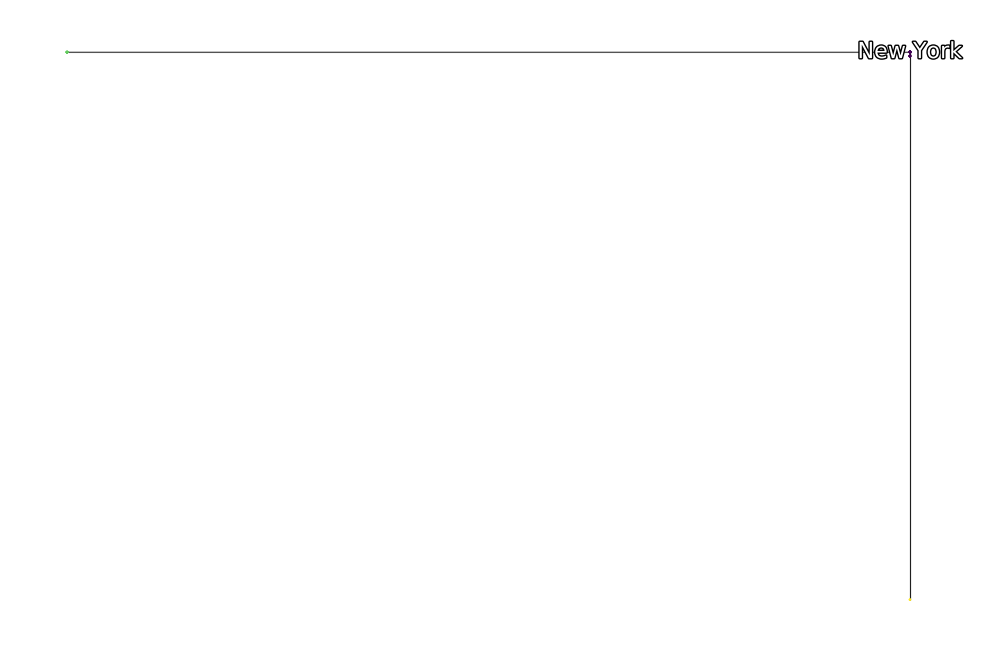

In [215]:
XQ,XR = np.linalg.qr(Xf2)
UR = np.linalg.svd(XR)[0]
U = XQ.dot(UR)
g.draw(U[:,[0,1]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[0,1]])
g.draw(U[:,[1,2]],nodesize=0.8,edgealpha=0.5,linewidth=0.4,nodecolor=xy[:,1])
label_cities(U[:,[1,2]])

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from collections import Counter
import networkx as nx
import community
from itertools import permutations 
import matplotlib.ticker as mtick
import matplotlib as mpl
import matplotlib.cm as cm
import sys
import localgraphclustering as lgc
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import multiprocessing as mp
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD

In [138]:
"""
G: GraphLocal instance
S: seed region where the local embedding needs to be computed
x,y: global embedding coordinates
ntrials: number of random seeds to select from S
seeds_lb,seeds_ub: the lower bound and the upper bound of the number of seeds to use in each experiment,
                   the code will use binary search to find the first radius threshold such that both lower 
                   bound and upper bound can be met.
scale: scaling parameter for global embedding when concatenating global coords with clustering results in SVD, 
       larger value means less deviated from global embedding.
delta: parameter for "sl_weighted"
alpha,iterations,rho: parameter for "l1reg-rand"
"""
​
def local_embedding(G,S,x,y,method="sl_weighted",nprocs=10,ntrials=500,seeds_lb=100,seeds_ub=1000,delta=0.1,
    alpha=0.01,iterations=int(1e6),rho=1.0e-8,scale=10):
    if method not in ["l1reg-rand","sl_weighted"]:
        print("Invalid method.")
        return [],[]
    records = np.zeros((G._num_vertices,ntrials))
    def wrapper(q_in,q_out):
        while True:
            trial_id = q_in.get()
            if trial_id is None:
                break
            np.random.seed(trial_id)
            selected_seed = np.random.choice(S,1)[0]
            max_radius = 0.1
            while True:
                seeds_subset = []
                curr_radius = max_radius
                for i in range(G._num_vertices):
                    if np.sqrt((x[i]-x[selected_seed])**2+(y[i]-y[selected_seed])**2) < curr_radius:
                        seeds_subset.append(i)
                if len(seeds_subset) <= seeds_lb:
                    max_radius *= 2
                else:
                    break
            min_radius = 0.0
            while True:
                seeds_subset = []
                curr_radius = (min_radius+max_radius)/2
                for i in range(G._num_vertices):
                    if np.sqrt((x[i]-x[selected_seed])**2+(y[i]-y[selected_seed])**2) < curr_radius:
                        seeds_subset.append(i)
                if len(seeds_subset) > seeds_ub:
                    max_radius = curr_radius
                elif len(seeds_subset) < seeds_lb:
                    min_radius = curr_radius
                else:
                    break
            if method == "l1reg-rand":
                output = lgc.approximate_PageRank(G,seeds_subset,method="l1reg-rand",alpha=alpha,iterations=iterations,rho=rho)[0]
            elif method == "sl_weighted":
                output = lgc.flow_clustering(G,seeds_subset,method="sl_weighted",delta=delta)[0]
            q_out.put((trial_id,output))
    q_in,q_out = mp.Queue(),mp.Queue()
    for i in range(ntrials):
        q_in.put(i)
    for _ in range(nprocs):
        q_in.put(None)
    procs = [mp.Process(target=wrapper,args=(q_in,q_out)) for _ in range(nprocs)]
    for p in procs:
        p.start()
    ncounts = 0
    while ncounts < ntrials:
        trial_id,output = q_out.get()
        records[output,trial_id] = 1
        ncounts += 1
    for p in procs:
        p.join()
    svd = TruncatedSVD(n_components=2, random_state=42,n_iter=40)
    records_local = np.hstack([records[:,0:ntrials],np.array([scale*x,scale*y]).T])
    svd.fit(records_local)
    local_coords = svd.transform(records_local)
    local_x,local_y = local_coords[:,0],local_coords[:,1]
    return local_x,local_y

SyntaxError: invalid character in identifier (<ipython-input-138-6510518b4a5c>, line 14)